# FEM7LB01

БГУ, ММФ  
4 курс, 5 группа  
Мухин Владислав

## Equation and Problem Definition

\begin{equation*}
\left\{
\begin{array}{ll}
-\Delta u=f, & \quad (x,y) \in \Omega=(0,1)^2\\
u=g, & \quad (x,y) \in \partial \Omega.
\end{array}
\right.
\end{equation*}

$u(x,y) = cos(xy)$. Then the task is defined as:

\begin{equation*}
\left\{
\begin{array}{ll}
-\Delta u = cos(xy) \cdot (x^2 + y^2), & \quad (x,y) \in \Omega=(0,1)^2\\
u(x,y)=1, & \quad (x,y) \in \partial \Omega \cap \{(x,y) : x=0\} \\
u(x,y)=cos~y, & \quad (x,y) \in \partial \Omega \cap \{(x,y) : x=1\}\\
u(x,y)=1, & \quad (x,y) \in \partial \Omega \cap \{(x,y) : y=0\}\\
u(x,y)=cos~x. & \quad (x,y) \in \partial \Omega \cap \{(x,y) : y=1\}\\
\end{array}
\right.
\end{equation*}

## Variational Form

Find $u \in V$ such that:

$$a(u, v) = L(v), \quad \forall v \in \hat{V}$$

$$ a(u, v) = \int_{\Omega}\nabla u \cdot \nabla v~dx, $$
$$ L(v) =  \int_{\Omega} f~v~dx $$
where $f = cos(xy) \cdot (x^2 + y^2) $.

## Imports

In [2]:
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2021-09-08 20:28:40--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1946 (1.9K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   1.90K  --.-KB/s    in 0s      

2021-09-08 20:28:40 (32.4 MB/s) - ‘/tmp/fenics-install.sh’ saved [1946/1946]

+ PYBIND11_INSTALL_SCRIPT_PATH=https://fem-on-colab.github.io/releases/pybind11-install.sh
+ [[ https://fem-on-colab.github.io/releases/pybind11-install.sh == http* ]]
+ wget https://fem-on-colab.github.io/releases/pybind11-install.sh -O /tmp/pybind11-install.sh
--2021-09-08 20:28:40--  https://fem-on-colab.github.io/releases/pybind11-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.1

In [4]:
import dolfin as dlf
import fenics as fnx
import mshr as mr
import numpy as np
from matplotlib import pyplot as plt

## Solution

### Initial Data

In [5]:
Ω = mr.Rectangle(dlf.Point(0, 0), dlf.Point(1, 1))

In [6]:
f = dlf.Expression("cos(x[0] * x[1]) * (pow(x[0], 2) + pow(x[1], 2))", degree=3)

g_L = dlf.Constant(1)
g_R = dlf.Expression("cos(x[1])", degree=3)
g_B = dlf.Constant(1)
g_T = dlf.Expression("cos(x[0])", degree=3)

### Mesh

In [7]:
resolution = 16
mesh = mr.generate_mesh(Ω, resolution)

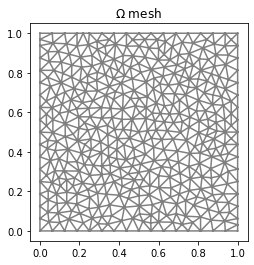

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))

plt.sca(ax)
dlf.plot(mesh)

ax.set_title("$\Omega$ mesh")

plt.show()

### Function Space

In [9]:
V = dlf.FunctionSpace(mesh, "P", 3)

u = dlf.TrialFunction(V)
v = dlf.TestFunction(V)

Calling FFC just-in-time (JIT) compiler, this may take some time.


### Exact Solution

In [10]:
u_e = dlf.Expression("cos(x[0] * x[1])", degree=3)

**Note**: if an Expression is used to represent an exact solution which is used to evaluate the accuracy of a computed solution, **a higher degree** than for the space $V$ must be used for the expression (one or two degree higher) [From FEniCS Tutorial 2016]

### Boundary Conditions

In [11]:
_TOLERANCE = 1e-14


class Γ_L(dlf.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and dlf.near(x[0], 0, _TOLERANCE)


class Γ_R(dlf.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and dlf.near(x[0], 1, _TOLERANCE)


class Γ_B(dlf.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and dlf.near(x[1], 0, _TOLERANCE)


class Γ_T(dlf.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and dlf.near(x[1], 1, _TOLERANCE)


markers = dlf.MeshFunction("size_t", mesh, mesh.topology().dim() - 1)

boundaries = [Γ_L, Γ_R, Γ_B, Γ_T]
bf = [g_L, g_R, g_B, g_T]

for i, b in enumerate(boundaries):
    b().mark(markers, i + 1)

bcs = [dlf.DirichletBC(V, g, markers, i + 1) for i, g in enumerate(bf)]

**Note**: To obtain optimal (order of) accuracy in computations, it is usually a good choice to use **the same degree** as for the space $V$ that is used for the trial and test functions [From FEniCS Tutorial 2016]

### Variational Problem Definition and Solution

In [12]:
a = dlf.dot(dlf.grad(u), dlf.grad(v)) * dlf.dx
L = f * v * dlf.dx

In [13]:
u = dlf.Function(V)
dlf.solve(a == L, u, bcs)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


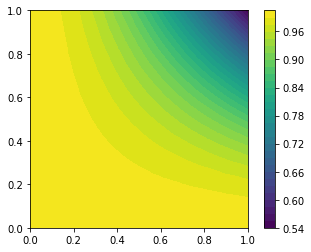

In [14]:
p = dlf.plot(u)
plt.colorbar(p)

plt.show()

### Comparing Exact and Approximate Solutions

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


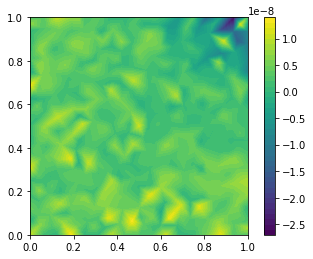

In [15]:
p = dlf.plot(u - u_e)
plt.colorbar(p)

plt.show()

In [16]:
error_L2 = dlf.errornorm(u_e, u, "L2")

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


In [17]:
error_L2

1.0322613677510134e-08

In [18]:
vertex_values_u_exact = u_e.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

error_max = np.max(np.abs(vertex_values_u_exact - vertex_values_u))

In [19]:
print(error_max)

3.745798060617034e-08


## Task 2

![image.png](attachment:05f1673a-b97b-41e9-8d49-b1a09e489dae.png)

In [ ]:
r = 1
Ω = mr.Circle(dlf.Point(0, 0), r)

f = dlf.Constant(0)

g_1 = dlf.Constant(1)
g_2 = dlf.Constant(-1)

resolution = 16
mesh = mr.generate_mesh(Ω, resolution)

V = dlf.FunctionSpace(mesh, "P", 2)

u = dlf.TrialFunction(V)
v = dlf.TestFunction(V)


class Γ_1(dlf.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and 0 <= x[1]


class Γ_2(dlf.SubDomain):
    def inside(self, x, on_boundary):
        return on_boundary and x[1] < 0


markers = dlf.MeshFunction("size_t", mesh, mesh.topology().dim() - 1)

boundaries = [Γ_1, Γ_2]
bf = [g_1, g_2]

for i, b in enumerate(boundaries):
    b().mark(markers, i + 1)

bcs = [dlf.DirichletBC(V, g, markers, i + 1) for i, g in enumerate(bf)]

a = dlf.dot(dlf.grad(u), dlf.grad(v)) * dlf.dx
L = f * v * dlf.dx

u = dlf.Function(V)
dlf.solve(a == L, u, bcs)

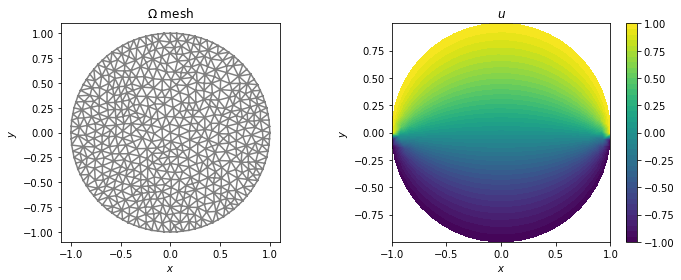

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

plt.sca(ax[0])
dlf.plot(mesh)

ax[0].set_title("$\Omega$ mesh")
ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

plt.sca(ax[1])
p = dlf.plot(u)
plt.colorbar(p)

ax[1].set_title("$u$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")

fig.tight_layout()

plt.show()

In [ ]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [ ]:
%watermark -a vlad.muhin1999@mail.ru -u -d -v -iv -w

Author: vlad.muhin1999@mail.ru

Last updated: 2020-12-18

Python implementation: CPython
Python version       : 3.8.6
IPython version      : 7.19.0

numpy     : 1.19.4
matplotlib: 3.3.3
mshr      : 2019.1.0
dolfin    : 2019.1.0

Watermark: 2.1.0

